#### 1. Perkenalan

Nama : Ridha Fuady<br>
Batch : FTDS-011<br>
Dataset : Credit Card Information<br>
Objective : Make Supervised Machine Learning Model to Predict Company Banckruptcy

### 2. Import Libraries

In [6]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE, SMOTENC
import pickle
import ast

### 3. Load Dataset

In [7]:
df_ori = pd.read_csv("Car_insurance_Claim.csv")
df_ori

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [8]:
df = df_ori.copy() #make a copy from dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [10]:
df.isnull().sum() #check missing value

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Terdapat 1839 Missing Value pada 2 column credit score dan annual mileage, kita akan melakukan imputer missing value pada data preprocessing

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
CHILDREN,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


### 4. Exploratory Data Analysis

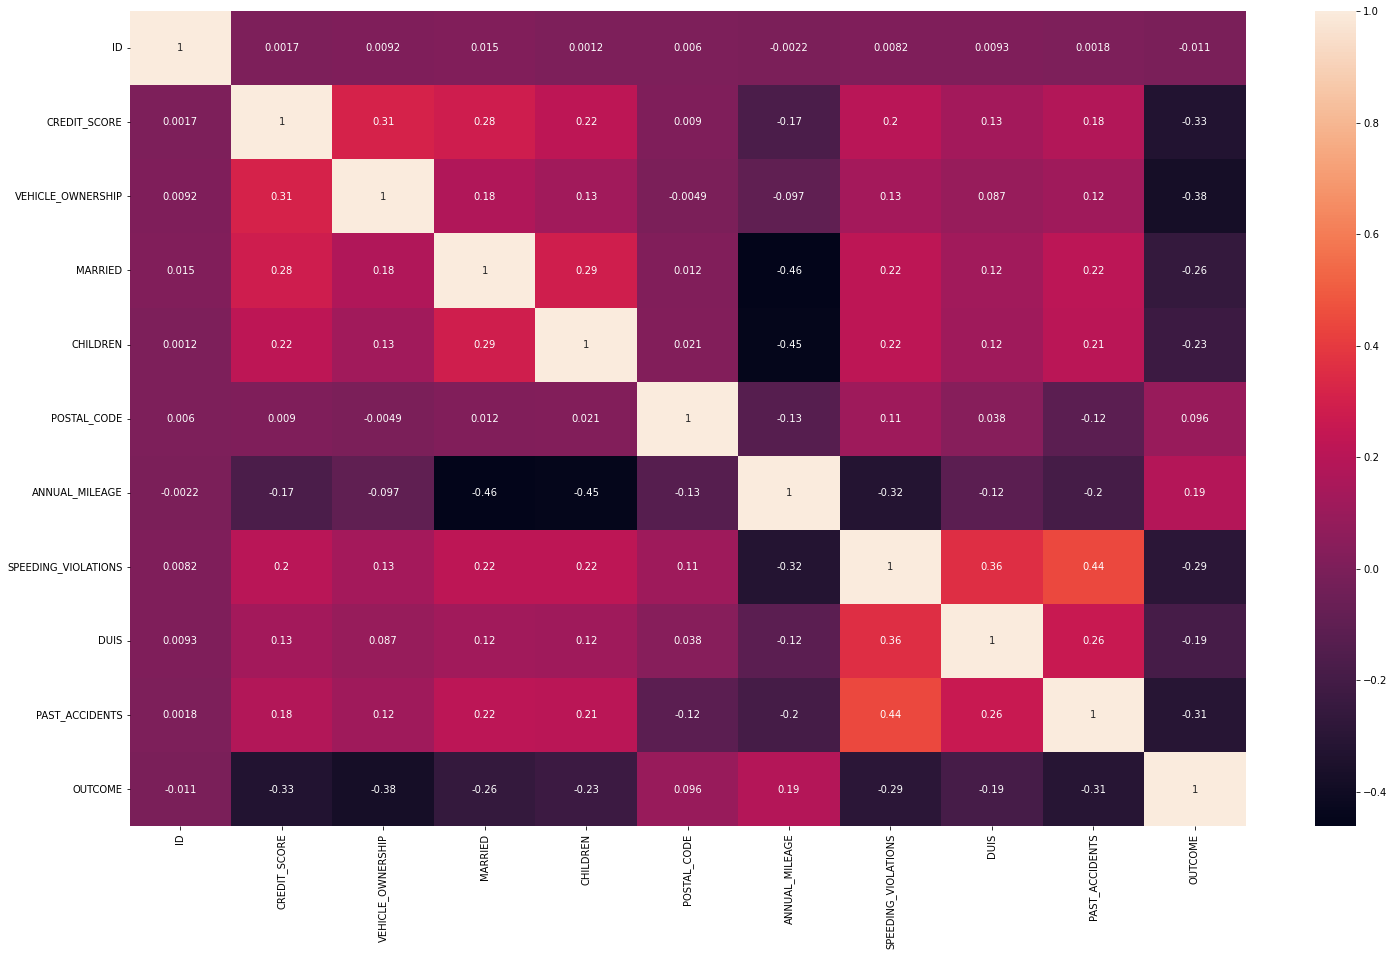

In [12]:
plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(), data =df, annot=True)
plt.show()

* Dari hasil pencarian korelasi berdasarkan heatmap pada column numerical, hampir semua feature numerical memiliki hubungan dengan target ("outcome") hanya feature ID saja yang tidak memiliki korelasi dengan target.
* Ada beberapa fitur yang memiliki korelasi yang rendah dengan target yaitu MARRIED, CHILDREN, POSTAL_CODE, ANNUAL_MILEAGE dan DUIS. Selanjutnya penanganan feature-feature ini akan dilanjutkan pada data preprocessing apakah akan dijadikan feature atau akan di drop

c:\Users\Fuad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


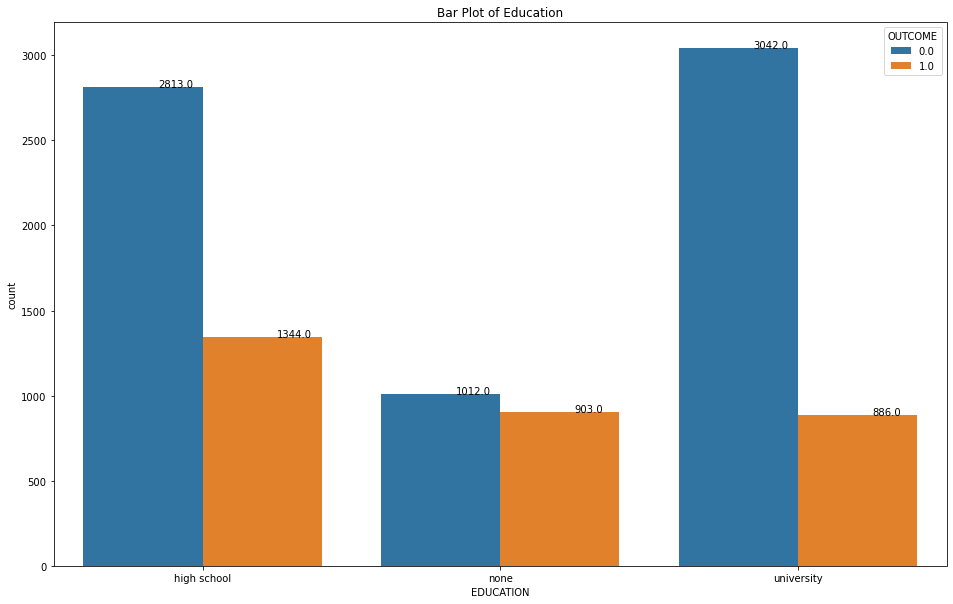

In [13]:
plt.figure(figsize=(16,10))
plt.subplot()
ax = sns.countplot("EDUCATION", hue="OUTCOME", data =df)
plt.title("Bar Plot of Education")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Jika kita lihat pada count plot education, konsumen dengan lulusan university lebih jarang melakukan claim asuransi pada kendaraanya, dibandingkan dengan konsumen yang hanya lulusan high school yang lebih sering melakukan claim.

c:\Users\Fuad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


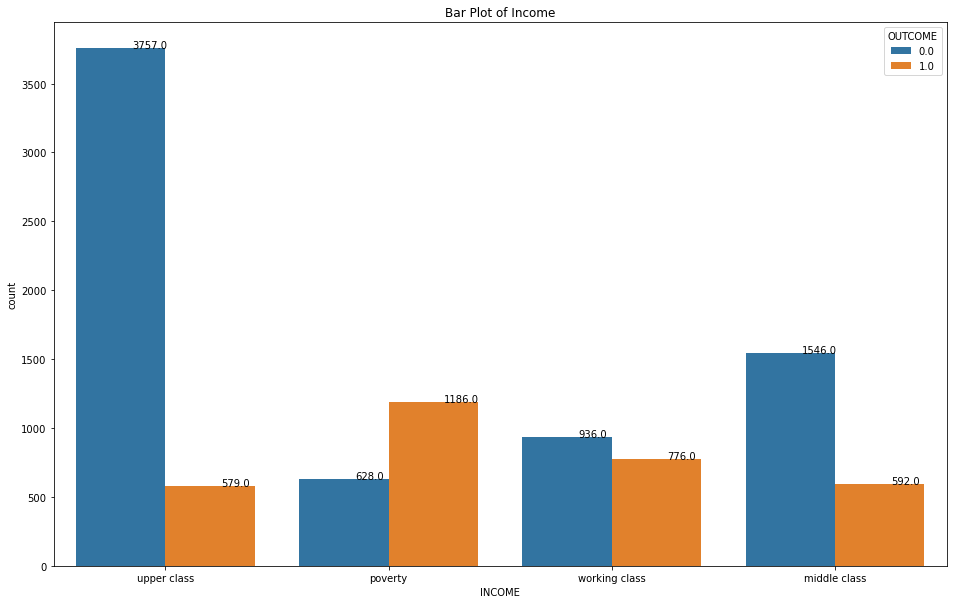

In [14]:
plt.figure(figsize=(16,10))
plt.subplot()
ax = sns.countplot("INCOME", hue="OUTCOME", data =df)
plt.title("Bar Plot of Income")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Pada hasil countplot upper class mendominasi sample pada dataset, dan jika kita perhatikan consumen dengan pendapatan pada upper class lebih sering tidak melakukan claim asuransi yaitu mencapai 80% lebih. Hal ini sangat berbanding terbalik dengan kolompok pendapatan poverty(miskin) yang dimana lebih sering melakukan claim asuransi dengan persentase mencapai 60% lebih.
Insight menarik yang saya dapat pada grafik ini adalah semakin tinggi pendapatan konsumen seperti upper class dan middle class, ternyata mempengaruhi seberapa jarang nya konsumen tersebut melakukan claim asuransi kendaraannya, berbeda dengan kelompok income rendah seperti working class dan poverty dimana konsumen pada kategori tersebut lebih sering melakukan claim asuransi kendaraannya.

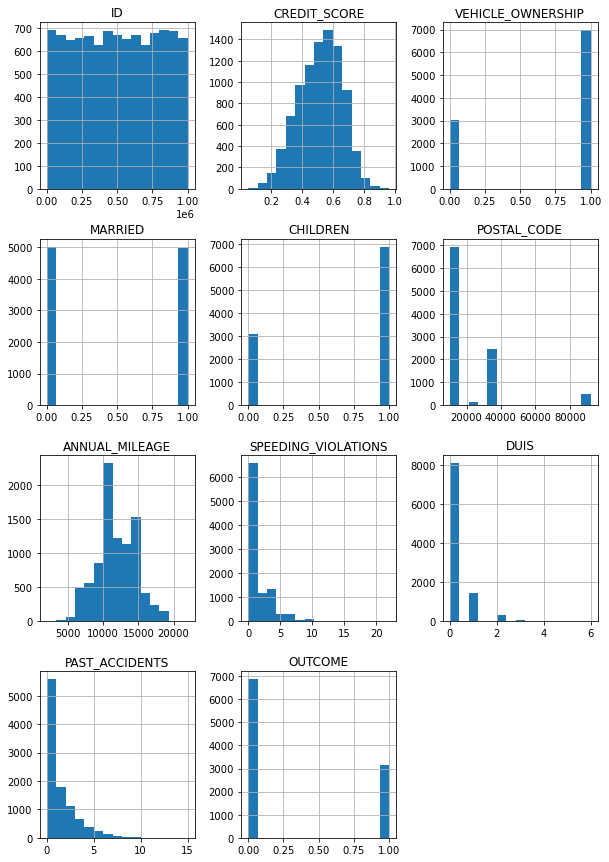

In [15]:
df.hist(bins=15, figsize=(10,15), layout=(4, 3));

Dari penyebaran data, ada 2 data yang terdistribusi dengan normal yaitucredit_score dan annual_mileage, tetapi pada distribusi annual mileage walaupun terdistribusi normal terdapat 2 peak dalam distribusinya.
Lalu terdapat column speeding violation, DUIS, dan past accidents yang data nya tidak terdistribusi normal atau pada gambar ketiga chart tersebut mengalami left skewed.
Dikarenakan akan melakukan salah satu pemodelan yang tidak sensitif dengan outlier seperti random forest maka saya tidak akan melakukan handling outliers pada ketiga feature tersebut.

<function matplotlib.pyplot.show(close=None, block=None)>

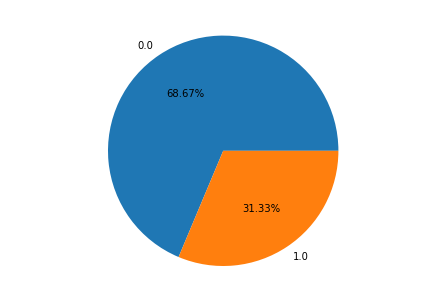

In [16]:
#make dataframe with valuecounts
df_outcome = df['OUTCOME'].value_counts().rename_axis("OUTCOME").reset_index(name="counts")

#set labels and values
outcome_labels = df_outcome.OUTCOME
outcome_values = df_outcome.counts

#visualize pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
ax.pie(outcome_values, labels=outcome_labels, autopct='%1.2f%%')
plt.show

Pada pie chart diatas dapat diliat bahwa terdapat imbalance data pada column target, walaupun imbalance yang terjadi tidak terlalu parah hanya 69 berbanding 31. Dan disini saya merasa imbalance data ini tidak perlu untuk melakukan feature sSMOTE-NC.

In [17]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

### 5. Data Preprocessing

In [18]:
#get data for model inference
df_inf = df.sample(10, random_state=2)
df_inf.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
7878,471153,65+,male,majority,10-19y,university,upper class,0.592550,1.0,after 2015,1.0,1.0,10238,9000.0,sedan,3,0,6,0.0
3224,96024,16-25,male,majority,0-9y,high school,poverty,0.343790,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,1.0
1919,704651,16-25,male,majority,0-9y,university,middle class,0.613793,1.0,after 2015,1.0,1.0,10238,14000.0,sedan,0,0,0,1.0
4432,229417,16-25,male,majority,0-9y,high school,middle class,0.342992,1.0,before 2015,0.0,0.0,32765,11000.0,sedan,0,0,0,0.0
4835,351587,26-39,female,majority,10-19y,none,poverty,0.289300,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,2,1,1,0.0


In [19]:
#remove inference-set from dataset
df_train_test = df.drop(df_inf.index)
df_train_test.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [20]:
#reset index to avoid error
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,471153,65+,male,majority,10-19y,university,upper class,0.592550,1.0,after 2015,1.0,1.0,10238,9000.0,sedan,3,0,6,0.0
1,96024,16-25,male,majority,0-9y,high school,poverty,0.343790,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,1.0
2,704651,16-25,male,majority,0-9y,university,middle class,0.613793,1.0,after 2015,1.0,1.0,10238,14000.0,sedan,0,0,0,1.0
3,229417,16-25,male,majority,0-9y,high school,middle class,0.342992,1.0,before 2015,0.0,0.0,32765,11000.0,sedan,0,0,0,0.0
4,351587,26-39,female,majority,10-19y,none,poverty,0.289300,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,2,1,1,0.0


In [21]:
#splitting dataset between X (features) and y (target)

X = df_train_test.drop(["ID", 'GENDER', "OUTCOME", 'RACE', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'DUIS'], axis = 1)
y = df_train_test["OUTCOME"]
X.head()

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
0,65+,0-9y,high school,upper class,0.629027,1.0,after 2015,0,0
1,16-25,0-9y,none,poverty,0.357757,0.0,before 2015,0,0
2,16-25,0-9y,high school,working class,0.493146,1.0,before 2015,0,0
3,16-25,0-9y,university,working class,0.206013,1.0,before 2015,0,0
4,26-39,10-19y,none,working class,0.388366,1.0,before 2015,2,1


In [22]:
#Split between train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)
#0.2 meaning is take 20% data from dataset to be test

print("Train Size: ", X_train.shape)
print("Test Size: ", X_test.shape)
print("Missing Value in X_train : ", X_train.isnull().sum().sum())
print("Missing Value in X_test : ", X_test.isnull().sum().sum())
print("Missing Value in y_train : ", y_train.isnull().sum().sum())
print("Missing Value in y_yrain : ", y_test.isnull().sum().sum())

Train Size:  (7992, 9)
Test Size:  (1998, 9)
Missing Value in X_train :  775
Missing Value in X_test :  207
Missing Value in y_train :  0
Missing Value in y_yrain :  0


In [23]:
mean_credit = X_train.CREDIT_SCORE.mean()

print('Mean Credit Score - Train Set - Before Imputation   : ', mean_credit)

Mean Credit Score - Train Set - Before Imputation   :  0.5152713987375293


In [24]:
mean_credit = X_test.CREDIT_SCORE.mean()

print('Mean Credit Score - Train Set - Before Imputation   : ', mean_credit)

Mean Credit Score - Train Set - Before Imputation   :  0.5181912209961603


In [25]:
X_train.fillna({"CREDIT_SCORE":0.515271,
                "ANNUAL_MILEAGE":11712}, inplace=True)

In [26]:
X_test.fillna({"CREDIT_SCORE": 0.518191,
                "ANNUAL_MILEAGE": 11634}, inplace=True)

In [27]:
print("Train Size: ", X_train.shape)
print("Test Size: ", X_test.shape)
print("Missing Value in X_train : ", X_train.isnull().sum().sum())
print("Missing Value in X_test : ", X_test.isnull().sum().sum())
print("Missing Value in y_train : ", y_train.isnull().sum().sum())
print("Missing Value in y_yrain : ", y_test.isnull().sum().sum())

Train Size:  (7992, 9)
Test Size:  (1998, 9)
Missing Value in X_train :  0
Missing Value in X_test :  0
Missing Value in y_train :  0
Missing Value in y_yrain :  0


Berdasarkan hasil heatmap, saya akan mengambil feature-feature numerical yang memiliki score korelasi diatas 0.3 sebagai feature pemodelan, dan untuk feature categorical saya akan drop feature-feature yang saya rasa tidak memiliki hubungan dengan target.
ID dan postal code adalah column yang saya rasa tidak memilki korelasi dengan target dikarenakan setiap isi columnya merupakan unique value. Lalu saya juga drop status menikah dan jumlah anak karna saya merasa status kekeluargaan tidak mempengaruhi konsumen akan melakukan claim asuransi kendaraanya atau tidak.

In [28]:
#split between numerical columns and categorical columns
num_columns = ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']
cat_columns = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']

print("Numerical Columns: ", num_columns)
print("Categorical Columns: ", cat_columns)

Numerical Columns:  ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']
Categorical Columns:  ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']


### Scaling and Encoding without Pipeline

In [29]:
#splitting train-set and test-set based on columns type
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [30]:
#scaling menggunakan minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.46998433, 0.        , 0.        , 0.        ],
       [0.50901726, 1.        , 0.        , 0.        ],
       [0.48200902, 1.        , 0.        , 0.13333333],
       ...,
       [0.50901726, 1.        , 0.09090909, 0.13333333],
       [0.44774598, 0.        , 0.        , 0.06666667],
       [0.50901726, 0.        , 0.        , 0.        ]])

In [31]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 0., 0., 1., 1.],
       [2., 2., 0., 3., 1.],
       [2., 1., 2., 0., 1.],
       ...,
       [3., 2., 0., 0., 1.],
       [2., 2., 1., 3., 1.],
       [0., 0., 2., 0., 1.]])

In [32]:
#concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[0.46998433, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.50901726, 1.        , 0.        , ..., 0.        , 3.        ,
        1.        ],
       [0.48200902, 1.        , 0.        , ..., 2.        , 0.        ,
        1.        ],
       ...,
       [0.50901726, 1.        , 0.09090909, ..., 0.        , 0.        ,
        1.        ],
       [0.44774598, 0.        , 0.        , ..., 1.        , 3.        ,
        1.        ],
       [0.50901726, 0.        , 0.        , ..., 2.        , 0.        ,
        1.        ]])

### Scaling & Encoding with Pipeline

Disini saya akan melakukan feature scaling kepada numeric features untuk mendapatkan range angka yang sama pada tiap featuresnya, dan saya menggunakan mixmaxscaler karena minmaxscaler untuk data yang terdistribusi tidak normal. Dan juga melakukan encoding untuk categorical features.

In [33]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

### 6. Model Definition

In [34]:
logreg_pipe = make_pipeline(data_pipeline, LogisticRegression())

In [35]:
svm_pipe = make_pipeline(data_pipeline, SVC())

In [36]:
rndm_pipe = make_pipeline(data_pipeline, RandomForestClassifier())

In [37]:
knn_pipe = make_pipeline(data_pipeline, KNeighborsClassifier())

### 7. Model Training

In [38]:
#Logistic Regression Training
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR'])])),
                ('logisticregression', LogisticRegression())])

In [39]:
#SVM Training
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR'])])),
                ('svc', SVC())])

In [40]:
#Random Forest Training
rndm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [41]:
#KNN Training
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### 8. Model Evaluation

In [42]:
logreg_y_pred_train = logreg_pipe.predict(X_train)
logreg_y_pred_test = logreg_pipe.predict(X_test)

#evaluate model train and test using classification report
print(classification_report(y_train, logreg_y_pred_train))
print(classification_report(y_test, logreg_y_pred_test))

#evaluate model using accuracy score
print("Logistic Regression Accuracy Score Train: ", accuracy_score(y_train, logreg_y_pred_train))
print("Logistic Regression Accuracy Score Test: ", accuracy_score(y_test, logreg_y_pred_test))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      5483
         1.0       0.71      0.76      0.73      2509

    accuracy                           0.82      7992
   macro avg       0.80      0.81      0.80      7992
weighted avg       0.83      0.82      0.83      7992

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1377
         1.0       0.72      0.73      0.72       621

    accuracy                           0.83      1998
   macro avg       0.80      0.80      0.80      1998
weighted avg       0.83      0.83      0.83      1998

Logistic Regression Accuracy Score Train:  0.8246996996996997
Logistic Regression Accuracy Score Test:  0.8268268268268268


Berdasarkan hasil predict algoritma logistic regression, terdapat hasil yang overfit pada score train and test nya, dan hasil yang goodfit pada accuracy score nya, hal ini bisa saja terjadi dikarenakan dari awal tidak dilakukannya handling imbalanced data.

Berdasarkan hasil

In [43]:
svm_y_pred_train = svm_pipe.predict(X_train)
svm_y_pred_test = svm_pipe.predict(X_test)

#evaluate model train and test using classification report
print(classification_report(y_train, svm_y_pred_train))
print(classification_report(y_test, svm_y_pred_test))

#evaluate model using accuracy score
print("SVM Accuracy Score Train: ", accuracy_score(y_train, svm_y_pred_train))
print("SVM Accuracy Score Test: ", accuracy_score(y_test, svm_y_pred_test))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      5483
         1.0       0.70      0.81      0.75      2509

    accuracy                           0.83      7992
   macro avg       0.80      0.82      0.81      7992
weighted avg       0.84      0.83      0.83      7992

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1377
         1.0       0.71      0.78      0.74       621

    accuracy                           0.83      1998
   macro avg       0.80      0.82      0.81      1998
weighted avg       0.84      0.83      0.83      1998

SVM Accuracy Score Train:  0.8304554554554554
SVM Accuracy Score Test:  0.8318318318318318


Berdasarkan hasil

In [44]:
rndm_y_pred_train = rndm_pipe.predict(X_train)
rndm_y_pred_test = rndm_pipe.predict(X_test)

#evaluate model train and test using classification report
print(classification_report(y_train, rndm_y_pred_train))
print(classification_report(y_test, rndm_y_pred_test))

#evaluate model using accuracy score
print("Random Forest Accuracy Score Train: ", accuracy_score(y_train, rndm_y_pred_train))
print("Random Forest Accuracy Score Test: ", accuracy_score(y_test, rndm_y_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5483
         1.0       0.99      0.99      0.99      2509

    accuracy                           0.99      7992
   macro avg       0.99      0.99      0.99      7992
weighted avg       0.99      0.99      0.99      7992

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1377
         1.0       0.67      0.60      0.63       621

    accuracy                           0.78      1998
   macro avg       0.75      0.73      0.74      1998
weighted avg       0.78      0.78      0.78      1998

Random Forest Accuracy Score Train:  0.9914914914914915
Random Forest Accuracy Score Test:  0.7827827827827828


Berdasarkan hasil predict algoritma random forest, didapatkan hasil yang aneh pada predict train dan test nya. Hasil yang didapat pada train nya itu sebesar 99% yang dimana hasil ini sangatlah tidak mungkin terjadi pada model manapun, hal ini bisa biasa terjadi pada model decision tree dan random forest. Untuk hasil test nya terdapat hasil yang overfit dimana hasil f1score class 0 nya 0.85 sedangkan class 1 nya hanya 0.64 

In [45]:
knn_y_pred_train = knn_pipe.predict(X_train)
knn_y_pred_test = knn_pipe.predict(X_test)

#evaluate model train and test using classification report
print(classification_report(y_train, knn_y_pred_train))
print(classification_report(y_test, knn_y_pred_test))

#evaluate model using accuracy score
print("KNN Accuracy Score Train: ", accuracy_score(y_train, knn_y_pred_train))
print("KNN Accuracy Score Test: ", accuracy_score(y_test, knn_y_pred_test))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      5483
         1.0       0.79      0.74      0.76      2509

    accuracy                           0.86      7992
   macro avg       0.84      0.82      0.83      7992
weighted avg       0.85      0.86      0.86      7992

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1377
         1.0       0.71      0.64      0.68       621

    accuracy                           0.81      1998
   macro avg       0.78      0.76      0.77      1998
weighted avg       0.80      0.81      0.80      1998

KNN Accuracy Score Train:  0.8563563563563563
KNN Accuracy Score Test:  0.8078078078078078


Berdasarkan hasil predict algoritma KNN dengan parameter default dapat kita lihat hasil yang overfit pada keseluruhan score nya. Untuk hasil test f1 score class 0 cukup bagus 0.86 tetapi untuk class 0.68 kurang bagus karena terpaut cukup jauh dengan class 0

### 9. Cross Validation

In [46]:
#Logistic Regression Cross Validation
logreg_cv_scores = cross_val_score(LogisticRegression(), X_train_final, y_train, cv=5)
print("Cross Validation Scores: ", logreg_cv_scores)
print("Mean crossval score: ", logreg_cv_scores.mean())
print("Std crossval score: ", logreg_cv_scores.std())

Cross Validation Scores:  [0.81676048 0.80550344 0.83354193 0.82603254 0.83479349]
Mean crossval score:  0.8233263749793558
Std crossval score:  0.010990392861861906


In [47]:
#SVM Cross Validation
svm_cv_scores = cross_val_score(SVC(), X_train_final, y_train, cv=5)
print("Cross Validation Scores: ", svm_cv_scores)
print("Mean crossval score: ", svm_cv_scores.mean())
print("Std crossval score: ", svm_cv_scores.std())

Cross Validation Scores:  [0.82113821 0.79799875 0.83291615 0.81414268 0.82978723]
Mean crossval score:  0.8191966036344681
Std crossval score:  0.012482374020986753


In [48]:
#Random Forest Cross Validation
rndm_cv_scores = cross_val_score(RandomForestClassifier(random_state=5), X_train_final, y_train, cv=5)
print("Cross Validation Scores: ", rndm_cv_scores)
print("Mean crossval score: ", rndm_cv_scores.mean())
print("Std crossval score: ", rndm_cv_scores.std())

Cross Validation Scores:  [0.78236398 0.78173859 0.80100125 0.78347935 0.79974969]
Mean crossval score:  0.7896665703924778
Std crossval score:  0.00877048158481404


In [49]:
#KNN Cross Validation
knn_cv_scores = cross_val_score(KNeighborsClassifier(), X_train_final, y_train, cv=5)
print("Cross Validation Scores: ", knn_cv_scores)
print("Mean crossval score: ", knn_cv_scores.mean())
print("Std crossval score: ", knn_cv_scores.std())

Cross Validation Scores:  [0.80175109 0.80175109 0.82227785 0.79599499 0.80600751]
Mean crossval score:  0.8055565078612179
Std crossval score:  0.008946412580033578


Berdasarkan hasil score validation ke 4 model, score CV algoritma logistic regression memiliki score paling baik yaitu 0.823 dengan nilai standar deviasi 0.01, dan score CV terburuk terdapat pada algorima random forest dengan rata-rata score 0.789 dengan standar deviasi 0.008

### GridsearchCV

In [50]:
logreg_param_grid = {"solver": ['lbfgs', 'liblinear'],
                    'max_iter': [100, 150, 200]}

In [51]:
best_logreg_score = 0
for solver in ['lbfgs', 'liblinear']:
    for max_iter in [100, 150, 200]:
        model_logreg=LogisticRegression(solver=solver, max_iter=max_iter)
        logreg_scores = cross_val_score(model_logreg, X_train_final, y_train, cv=5)
        logreg_score = np.mean(logreg_scores)
        if logreg_score > best_logreg_score:
            best_logreg_score = logreg_score
            logreg_best_param = {"solver": solver, "max_iter": max_iter}
print("Best Parameter :{}".format(logreg_best_param))

Best Parameter :{'solver': 'liblinear', 'max_iter': 100}


In [52]:
logreg_pipe2 = make_pipeline(data_pipeline, LogisticRegression(solver= 'liblinear', max_iter= 100))

In [53]:
logreg_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [54]:
logreg_y_pred_train2 = logreg_pipe2.predict(X_train)
logreg_y_pred_test2 = logreg_pipe2.predict(X_test)

#evaluate model train and test using classification report
print(classification_report(y_train, logreg_y_pred_train2))
print(classification_report(y_test, logreg_y_pred_test2))

#evaluate model using accuracy score
print("Logistic Regretion Accuracy Score Train: ", accuracy_score(y_train, logreg_y_pred_train2))
print("Logistic Regretion Accuracy Score Test: ", accuracy_score(y_test, logreg_y_pred_test2))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      5483
         1.0       0.71      0.76      0.73      2509

    accuracy                           0.82      7992
   macro avg       0.80      0.81      0.80      7992
weighted avg       0.83      0.82      0.83      7992

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1377
         1.0       0.72      0.73      0.72       621

    accuracy                           0.83      1998
   macro avg       0.80      0.80      0.80      1998
weighted avg       0.83      0.83      0.83      1998

Logistic Regretion Accuracy Score Train:  0.8244494494494494
Logistic Regretion Accuracy Score Test:  0.8268268268268268


Setelah dilakukan hyperparameter tuning untuk model Logistic Regretion kita mendapatkan hasil yang lebih baik dibandingkan sebelum hyperparameter tuning, terlihat dari accuracy score yang dimana sebelum melakukan hyperparameter tuning terjadi overfit dan setelah melakukan hyperparameter tuning dengan gridsearch dan crossvalidation kita mendapatkan model yang goodfit walaupun terjadi pengurangan sedikit pada nilai f1-score pada class 1 di test predictnya.

In [55]:
rndm_param_grid = {'criterion': ["gini", "entropy"],
                    'bootstrap': [True],
                    'oob_score':[True],
                    'random_state':[50],
                    'max_depth': [4, 5, 8, 10, 15, 20]}

In [56]:
best_rndm_score = 0
for criterion in ["gini", "entropy"]:
    for max_depth in [4, 5, 8, 10, 15, 20]:
        model_rndm=RandomForestClassifier(criterion=criterion, max_depth=max_depth, bootstrap=True, oob_score=True, random_state=1)
        rndm_scores = cross_val_score(model_rndm, X_train_final, y_train, cv=5)
        rndm_score = np.mean(rndm_scores)
        if rndm_score > best_rndm_score:
            best_rndm_score = rndm_score
            rndm_best_param = {"criterion": criterion, "max_depth": max_depth}
print("Best Parameter :{}".format(rndm_best_param))

Best Parameter :{'criterion': 'entropy', 'max_depth': 8}


In [57]:
rndm_pipe2 = make_pipeline(data_pipeline, RandomForestClassifier(criterion="entropy", max_depth=8, random_state=1))

In [58]:
rndm_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        random_state=1))])

In [59]:
rndm_y_pred_train2 = rndm_pipe2.predict(X_train)
rndm_y_pred_test2 = rndm_pipe2.predict(X_test)

#evaluate model train and test using classification report
print(classification_report(y_train, rndm_y_pred_train2))
print(classification_report(y_test, rndm_y_pred_test2))

#evaluate model using accuracy score
print("Random Forest Accuracy Score Train: ", accuracy_score(y_train, rndm_y_pred_train2))
print("Random Forest Accuracy Score Test: ", accuracy_score(y_test, rndm_y_pred_test2))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      5483
         1.0       0.73      0.78      0.75      2509

    accuracy                           0.84      7992
   macro avg       0.81      0.82      0.82      7992
weighted avg       0.84      0.84      0.84      7992

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      1377
         1.0       0.72      0.73      0.73       621

    accuracy                           0.83      1998
   macro avg       0.80      0.80      0.80      1998
weighted avg       0.83      0.83      0.83      1998

Random Forest Accuracy Score Train:  0.8415915915915916
Random Forest Accuracy Score Test:  0.8293293293293293


Setelah dilakukan hyperparameter tuning untuk model Random Forest kita mendapatkan hasil yang lebih baik dibandingkan sebelum hyperparameter tuning, terlihat dari accuracy score yang dimana sebelum melakukan hyperparameter tuning terjadi overfit dan setelah melakukan hyperparameter tuning dengan gridsearch dan crossvalidation kita mendapatkan model yang goodfit walaupun terjadi pengurangan sedikit pada nilai f1-score pada class 1 di test predictnya.

In [60]:
knn_param_grid = {'n_neighbors': [3, 4, 5, 6, 7],
                    'weights': ["uniform", "distance"],
                    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

In [61]:
best_knn_score = 0
for n_neighbors in [3, 4, 5, 6, 7]:
    for weights in ["uniform", "distance"]:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            model_knn=KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
            knn_scores = cross_val_score(model_knn, X_train_final, y_train, cv=5)
            knn_score = np.mean(knn_scores)
            if knn_score > best_knn_score:
                best_knn_score = knn_score
                knn_best_param = {"n_neighbors": n_neighbors, "weights": weights, "algorithm":algorithm}
print("Best Parameter :{}".format(knn_best_param))

Best Parameter :{'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'brute'}


In [62]:
knn_pipe2 = make_pipeline(data_pipeline, KNeighborsClassifier(n_neighbors= 7, weights= 'uniform', algorithm= 'brute'))

In [63]:
knn_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=7))])

In [64]:
knn_y_pred_train2 = knn_pipe2.predict(X_train)
knn_y_pred_test2 = knn_pipe2.predict(X_test)

#evaluate model train and test using classification report
print(classification_report(y_train, knn_y_pred_train2))
print(classification_report(y_test, knn_y_pred_test2))

#evaluate model using accuracy score
print("KNN Accuracy Score Train: ", accuracy_score(y_train, knn_y_pred_train2))
print("KNN Forest Accuracy Score Test: ", accuracy_score(y_test, knn_y_pred_test2))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5483
         1.0       0.77      0.74      0.75      2509

    accuracy                           0.85      7992
   macro avg       0.83      0.82      0.82      7992
weighted avg       0.85      0.85      0.85      7992

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1377
         1.0       0.71      0.65      0.68       621

    accuracy                           0.81      1998
   macro avg       0.78      0.76      0.77      1998
weighted avg       0.80      0.81      0.81      1998

KNN Accuracy Score Train:  0.8490990990990991
KNN Forest Accuracy Score Test:  0.8078078078078078


Setelah dilakukan hyperparameter tuning untuk model KNN kita mendapatkan hasil yang sama saja tidak ada perubahan dibandingkan sebelum hyperparameter tuning, terlihat dari accuracy score yang dimana sebelum melakukan hyperparameter tuning terjadi overfit dan setelah melakukan hyperparameter tuning dengan gridsearch dan crossvalidation kita mendapatkan model yang tetap overfit dan terjadi pengurangan sedikit pada nilai f1-score pada class 1 di test predictnya.

### 10. Model Saving


In [65]:
with open("final_pipe.pkl", "wb") as model_file:
    pickle.dump(logreg_pipe2, model_file)

### 11. Model Inference

Setelah melakukan hyperparameter tuning pada 4 model saya memutuskan untuk menggunakan algoritma logistic regretion untuk permodelan akhir yang dimana hasilnya sangat goodfit pada accuracy scorenya walaupun jika kita perhatikan pada confusion matrix nya model ini masih mengalami overfit

In [66]:
with open("final_pipe.pkl" , "rb") as model_file:
    logreg_pipe2 = pickle.load(model_file)

In [67]:
df_inf

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,471153,65+,male,majority,10-19y,university,upper class,0.592550,1.0,after 2015,1.0,1.0,10238,9000.0,sedan,3,0,6,0.0
1,96024,16-25,male,majority,0-9y,high school,poverty,0.343790,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,1.0
2,704651,16-25,male,majority,0-9y,university,middle class,0.613793,1.0,after 2015,1.0,1.0,10238,14000.0,sedan,0,0,0,1.0
3,229417,16-25,male,majority,0-9y,high school,middle class,0.342992,1.0,before 2015,0.0,0.0,32765,11000.0,sedan,0,0,0,0.0
4,351587,26-39,female,majority,10-19y,none,poverty,0.289300,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,2,1,1,0.0
5,670230,40-64,female,majority,0-9y,university,middle class,0.528327,0.0,after 2015,1.0,1.0,10238,10000.0,sports car,0,0,0,0.0
6,219586,65+,male,majority,10-19y,university,upper class,0.574993,1.0,after 2015,1.0,1.0,92101,11000.0,sedan,0,0,0,0.0
7,193047,26-39,male,majority,10-19y,university,middle class,0.474442,1.0,before 2015,0.0,1.0,10238,16000.0,sedan,0,0,2,1.0
8,845494,26-39,female,majority,10-19y,university,middle class,0.567130,1.0,after 2015,1.0,1.0,10238,11000.0,sedan,1,1,0,0.0
9,935327,65+,male,majority,10-19y,high school,upper class,0.478438,1.0,after 2015,1.0,1.0,10238,11000.0,sedan,0,0,1,0.0


In [68]:
#predict data inference
y_pred_inf = logreg_pipe2.predict(df_inf)
y_pred_inf

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 0.])

In [69]:
#convert into dataframe

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=["OUTCOME_LOGREG"])
y_pred_inf_df

,OUTCOME_LOGREG
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
5,1.0
6,0.0
7,0.0
8,0.0
9,0.0


In [70]:
#merge dengan dataframe lama

dflogreg = pd.concat([df_inf, y_pred_inf_df], axis = 1)
dflogreg

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,OUTCOME_LOGREG
0,471153,65+,male,majority,10-19y,university,upper class,0.592550,1.0,after 2015,1.0,1.0,10238,9000.0,sedan,3,0,6,0.0,0.0
1,96024,16-25,male,majority,0-9y,high school,poverty,0.343790,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,1.0,1.0
2,704651,16-25,male,majority,0-9y,university,middle class,0.613793,1.0,after 2015,1.0,1.0,10238,14000.0,sedan,0,0,0,1.0,0.0
3,229417,16-25,male,majority,0-9y,high school,middle class,0.342992,1.0,before 2015,0.0,0.0,32765,11000.0,sedan,0,0,0,0.0,1.0
4,351587,26-39,female,majority,10-19y,none,poverty,0.289300,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,2,1,1,0.0,1.0
5,670230,40-64,female,majority,0-9y,university,middle class,0.528327,0.0,after 2015,1.0,1.0,10238,10000.0,sports car,0,0,0,0.0,1.0
6,219586,65+,male,majority,10-19y,university,upper class,0.574993,1.0,after 2015,1.0,1.0,92101,11000.0,sedan,0,0,0,0.0,0.0
7,193047,26-39,male,majority,10-19y,university,middle class,0.474442,1.0,before 2015,0.0,1.0,10238,16000.0,sedan,0,0,2,1.0,0.0
8,845494,26-39,female,majority,10-19y,university,middle class,0.567130,1.0,after 2015,1.0,1.0,10238,11000.0,sedan,1,1,0,0.0,0.0
9,935327,65+,male,majority,10-19y,high school,upper class,0.478438,1.0,after 2015,1.0,1.0,10238,11000.0,sedan,0,0,1,0.0,0.0


### Kesimpulan

* Dari hasil percobaan model logistic regretion setelah dihypertuning hasilnya tidak memuaskan, berdasarkan pengujian dengan data inference dari 10 data row hasil predict nya hanya lah 50% benar. Mengingat hasil evaluasi model yang perlu diimprove lagi lebih baik kita melakukan pengecekan dataset lebih dalam lagi dan melakukan feature feature engineering yang lebih mendalam agar mendapat hasil model yang lebih baik.
* Terdapat imbalance data pada column target yang dimana seharusnya sebelum pembuatan model harus dihandling terlebih dahulu, mengingat waktu pekerjaan yang singkat dan kemampuan saya dalam menggunakan fitur SMOTENC + pipeline maka saya memutuskan untuk tidak melakukan handling imbalance data. Untuk kedepannya diharapkan melakukan improvement dengan handling imbalance data.